# Lab 8: Define and Solve an ML Problem of Your Choosing

In [18]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [19]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

print(df['income_binary'].value_counts())

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

For my machine learning project, I chose the censusData.csv dataset. My goal is to build a model that can predict whether a person earns more than $50,000 per year or not. The column I will be predicting is called income_binary, which has two possible values: <=50K or >50K. This makes it a binary classification problem, and since the data already includes the correct answers (labels), it is a supervised learning problem.

To make the prediction, I will use different pieces of information (called features) from the dataset. These include things like a person’s age, work class, education level, marital status, job type, race, gender, hours worked per week, and country of origin. Some of the specific features I plan to use are: age, workclass, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, and native-country. I might update this list after exploring the data more.

This is an important problem to solve because a company can use this type of model to identify high-earning customers, target advertisements, or offer financial products like loans or credit cards more efficiently. It can also help businesses with hiring, planning, or customer service by giving insights into people’s financial situations. Overall, predicting income can help companies make smarter decisions and provide better services.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# View data structure and check for issues
print("Data Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nClass Distribution:")
print(df['income_binary'].value_counts())

# Handle missing numerical values
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].mean())

if 'hours-per-week' in df.columns:
    df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].mean())

# Handle missing categorical values
for col in ['workclass', 'occupation', 'native-country']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical columns 
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex_selfID', 'native-country']
categorical_cols = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert target column to 0 and 1
df['income_binary'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# 🧪 Split into features (X) and label (y)
X = df.drop('income_binary', axis=1)
y = df['income_binary']

# Re-split the data with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,  # <- very important
)

# Check class distribution
print("Train label distribution:\n", y_train.value_counts(normalize=True))
print("\nTest label distribution:\n", y_test.value_counts(normalize=True))

#Scale numerical data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data cleaned and ready for modeling")



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB

Summary Statistics:
                age        fnlwg

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After exploring and cleaning the data, I am keeping all the features that help predict income, including both numerical features like age, education-num, capital-gain, and hours-per-week, as well as many one-hot encoded features like occupation, marital-status, race, and native-country. I removed no features for now because they all appear to contribute useful information for the model.

To prepare the data, I filled missing values in numerical columns with the column average and filled missing values in categorical columns with the most common value. I also used one-hot encoding to turn categorical features into numerical format so that the model can work with them. Lastly, I scaled the data using StandardScaler, which helps K-Nearest Neighbors (KNN) work better since it depends on distances.

For my model, I will use K-Nearest Neighbors (KNN). I chose this because it’s easy to understand, works well with scaled data, and is good for classification tasks like this one.

To train the model, I split the data into training and testing sets. I will use accuracy, precision, recall, and F1-score to evaluate how well the model performs. If the model does not perform well, I will try changing the number of neighbors (K) or try a different model like Random Forest or Logistic Regression. My goal is to build a model that works well on the test data and can make accurate predictions on new, unseen data.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

 KNN Model Evaluation:

Accuracy: 0.8306463995086749
Precision: 0.6657223796033994
Recall: 0.5983450031826862
F1 Score: 0.6302380154207174


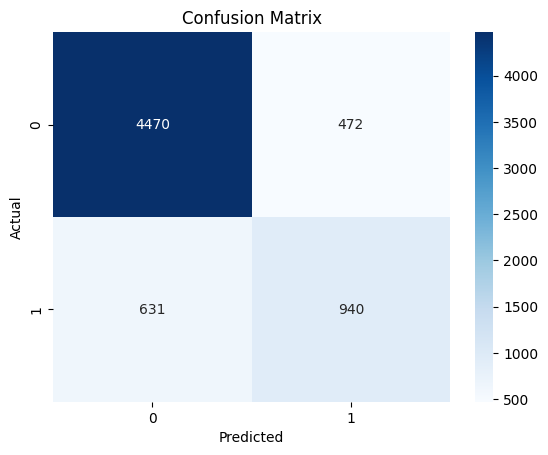


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4942
           1       0.67      0.60      0.63      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513



In [22]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
print(" KNN Model Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))